# Homework 2

## Due Thursday, September 20th 2018 at 11:59 PM.

### Be sure to push the final version of your notebook to your GitHub repo.  Follow the instructions on the course website.

### Topics

#### [Part 1](#part_1): Get Familiar with `git`
- [Problem 1](#p1). Git and recovering from a mistake
- [Problem 2](#p2). Git and checking out a single file

#### [Part 2](#part_2): Python Basics
- [Problem 3](#p3). Count and plot
- [Problem 4](#p4). Average area of the circles (part 1)

#### [Part 3](#part_3): Closure and Decorators
- [Problem 5](#p5). Simple bank account withdraw system
- [Problem 6](#p6). Average area of the circles (part 2)
- [Problem 7](#p7). Positivity

---

---
<a id='part_1'></a>
## Part 1 [10 pts]: Get Familiar with GitHub
**Note:** Start this problem after Lecture 3.

<a id='p1'></a>
### Problem 1 [5 pts]:  `Git` and recovering from a mistake
Here's the scenario for this problem.  In Lecture, you created a branch in your `playground` repo called `mybranch1`.  You worked on `mybranch1` and created a file called `books.md`, but you never merged that file into your `master` branch.  In fact, we'll operate under the assumption that you really *don't* want to merge `books.md` into `master` yet.  However, being human, you are bound to make mistakes.  In this problem, you will clone `playground` and forget to switch to `mybranch1`.  You will accidentally pull `books.md` into `master`.  Then, you will recover from this mistake by reverting `master` to an earlier state; one that doesn't have `books.md`.

You will do this problem in the `Jupyter` notebook so we can see your output.  Once again, you will work with your `playground` repository (created and explored in Lectures 2 and 3).

**NOTE:** At the beginning of each `Jupyter` notebook cell, you MUST type `%%bash`.  If you don't do that then you will not be able to work with the necessary bash commands.

Follow the following steps for this problem:

1. First cell:
  1. Type `cd /tmp` to enter the temporary directory
  2. `git clone <url to your playground repo>` <br>
  **Note:** If you want to re-clone the repo (after you already cloned it), make sure you delete the old repo using `rm -r /tmp/playground`.
2. Second cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git pull origin mybranch1`
  3. `ls` <br>
  Uh oh!  `books.md` is now in your `master` branch!
3. Third cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git status` <br>
  Your local `master` branch is now ahead of the remote `master`!
4. Fourth cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git reset --hard origin/master`
  3. `ls` <br>
  `books.md` is gone!
5. Fifth cell:
  1. Go into your local `playground` directory (`cd /tmp/playground`)
  2. Type `git status` <br>
  Everything is back to normal.

The whole point of this problem was to show you how to get your local repo back to an earlier state.  In this exercise, you accidentally merged something to `master` that you didn't want.  Rather than starting to delete things all over the place, you can simply reset your `HEAD` to a previous commit.

**IMPORTANT!** This is a proper `git` workflow.  DO NOT start deleting, rebasing, or re-cloning everything.  Take one step at a time, think about the decisions you're making, and execute deliberately.  It will take a little practice in the beginning, but time spent now will translate to lots of time saved later.

In [41]:
%%bash
cd /tmp
rm -rf playground #remove if it exists
git clone https://github.com/cheunjm/playground.git

Cloning into 'playground'...


In [42]:
%%bash
cd /tmp/playground
git pull origin mybranch1
ls

Merge made by the 'recursive' strategy.
 books.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 books.md
README.md
books.md
feature.txt
messages.md
world.md


From https://github.com/cheunjm/playground
 * branch            mybranch1  -> FETCH_HEAD


In [43]:
%%bash
cd /tmp/playground
git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)
nothing to commit, working tree clean


In [44]:
%%bash
cd /tmp/playground
git reset --hard origin/master
ls

HEAD is now at cc7d9c1 Update README
README.md
feature.txt
messages.md
world.md


In [45]:
%%bash
cd /tmp/playground
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


---
<a id='p2'></a>
### Problem 2 [5 pts]:  `Git` and checking out a single file
Sometimes you don't want to merge an entire branch from the upstream but just one file from it. There is a direct use case for such a situation. Suppose I've made an error in this homework (or a lecture) and want to correct it. I fix the mistake in the upstream repo. In the meantime you have edited some other files and you really don't want to manually ignore my older copies of those files. Rather, you want to fix just one file from this new branch. This is how you do it.

As usual, be sure to type in `%%bash` before you write any `bash` commands in a cell.

**Note:** The steps below assume that you have already cloned the `playground` repo in this notebook.

1. First cell:
  1. Go into the `playground` repo and fetch the changes from the master branch of the `course` remote.
2. Second cell:
  1. `git checkout course/master -- README.md`.  The `--` means that `README.md` is a file (as opposed to a `branch`).
  2. `cat README.md`.  This just looks at the updated file.
3. Third cell:
  1. `git status`
  2. Commit the changes to your local repo with an appropriate commit message.
  3. `git status`
  4. Push the changes to your remote repo.

In [46]:
%%bash
cd /tmp/playground
git remote add course https://github.com/IACS-CS-207/playground.git
git fetch course

From https://github.com/IACS-CS-207/playground
 * [new branch]      master     -> course/master


In [47]:
%%bash
cd /tmp/playground
git checkout course/master -- README.md
cat README.md

# Playground Repo

A new Fall 2018 message.


In [48]:
%%bash
cd /tmp/playground
git status
git add README.md
git commit -m "Update README"
git status
git push


On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean
On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean
On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


Everything up-to-date


---
<a id='part_2'></a>
## Part 2 [20 pts]: Python Basics
<a id='p3'></a>
### Problem 3 [10 pts]: Count and Plot
In this problem, you will make a bar plot of the computer languages that students who take CS207 know.  The file `languages.txt` contains all the languages that students listed as their primary language in the course survey from a previous iteration of the course.

Do the following:
* Load the language strings from the file into a list.
* Use the `Counter` method from the `collections` library to count the number of occurrences of each element of the list.  **Print out your answer to the screen.**
* Create a bar plot to display the frequency of each language.  Be sure to label the x-axis!
  + Remember, to create plots in the notebook you must put the line `%matplotlib inline` at the beginning of your notebook.  You may also want to check out `%matplotlib notebook`.
  + Be sure to import matplotlib:  `import matplotlib.pyplot as plt`.
  + To generate the bar plot write `plt.bar(x_coords, freqs)`.  You need to define `x_coords` and `freqs`.
  + **Hint:** You may want to use the `numpy` `arange` function to create `x_coords`.  Remember, `x_coords` is the x-axis and it should have points for each distinct language.
  + **Hint:** To get `freqs`, you may want to use the `values()` method on your result from step 3.  That is, `freqs = result_from_3.values()`.
  + **Hint:** To label the x-axis you should use `plt.xticks(x_coords, labels)` where labels can be accessed through the `keys()` method on your result from step 3.

Counter({'Python': 25, 'Java': 7, 'C++': 6, 'Other': 2, 'SQL': 2, 'C': 1, 'C#': 1, 'VB': 1})


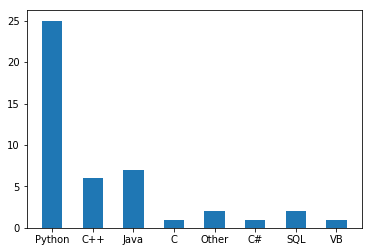

In [50]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with open('languages.txt', 'r') as f:
    # Load the language strings from the file into a list
    lines = f.read().splitlines()
    
    # Count the number occurrences of each element of the list
    freqs = Counter(lines)
    print(freqs)
    
    # Createa bar plot to display the frequency of each language
    labels, values = zip(*Counter(lines).items())
    x_coords = np.arange(len(labels))

    plt.bar(x_coords, values, 0.5)
    plt.xticks(x_coords, labels)
    plt.show()

---
<a id='p4'></a>
### Problem 4 [10 pts]: Average Area of the Circles (Part 1)
The file `circles.txt` contains measurements of circle radii.  Your task is to write a script that reports the average area of the circles.  You will **not** use the `numpy` `mean` function.  Here are the requirements:
1. Open `circles.txt`, read in the data, and convert the data to floats. Store in a list.
2. Write a function that computes the area of a circle.  The argument should be a single `float`.
3. Write a function, called `myave`, that computes the average of the areas of the circles.
   - At the very least, `myave` should accept the list of radii as one argument and the circle function that you wrote in step 2 as another argument.
   - **Note:** There are other ways of doing this task, but I want you to do it this way.
4. Print out the result.

In [51]:
data = []
with open('circles.txt', 'r') as f:
    # Convert the data to floats and store in a list
    data = [float(item) for item in f.read().splitlines()]

In [52]:
from collections import Counter
import math

# Write a function that ocmputes the area of a circle
def circle_area(radius):
    return math.pi * radius * radius

# Write a function that computes the average of the areas of the circle
def myave(radii, f):
    areas = [f(radius) for radius in radii]
    return sum(areas) / float(len(areas))

print(myave(data, circle_area))

3.1958990970819956


---
<a id='part_3'></a>
## Part 3 [30 pts]: Closures and Decorators
<a id='p5'></a>
### Problem 5 [10 pts]: Simple Bank Account Withdraw System
The goal of this problem is to write a simple bank account withdraw system.  The problem is based off of a problem in _Structure and Interpretation of Computer Programs_.

**Instructions:** Do each part in a different cell block and clearly label each part.

**a).**
Write a closure to make withdraws from a bank account.  The outer function should be accept the initial balance as an argument (I'll refer to this argument as `balance` in this problem statement, but you can call it whatever you want).  The inner function should accept the withdraw amount as an argument and return the new balance.

**NOTE 1:** For this part, do not try to reassign `balance` in the inner function.  Just see what happens when you return a new balance.  You can store the new balance in a new name (call it `new_bal` if you want) or just return the new balance directly.

**NOTE 2:** You should check for basic exceptions (e.g. attempting to withdraw more than the current balance).

Once you write your functions, demo them in your notebook as follows:

```python
wd = make_withdraw(init_balance)
wd(withdraw_amount)
wd(new_withdraw_amount)
```

You should observe that this does not behave correctly.  **Explain why not.**

In [53]:
### part a
def make_withdraw(balance):
    def update_balance(withdraw_amount):
        new_balance = balance - withdraw_amount
        if new_balance < 0:
            print("You have not enough balance")
            return
        return new_balance
    return update_balance

# Initialize variables
init_balance = 1000
withdraw_amount = 100
new_withdraw_amount = 200

# Demo functions
wd = make_withdraw(init_balance)
wd(withdraw_amount)
wd(new_withdraw_amount)


800

We want the new balance after withdrawing 200 to be 1000 - 100 - 200 = 700, but as we can see, the new balance is 800. This is because everytime update_balance is called, balance is equal to 1000, the init_balance.

**b).**
You can fix things up by updating `balance` within the inner function.  But this won't work.  Try it out and explain why it doesn't work.  Try to use the language that we used in lecture.  

  * **Hint:** [Python Execution Model](https://docs.python.org/3/reference/executionmodel.html).

In [54]:
### part b
def make_withdraw(balance):
    def update_balance(withdraw_amount):
        balance = balance - withdraw_amount
        if balance < 0:
            print("You have not enough balance")
            return
        return balance
    return update_balance

# Initialize variables
init_balance = 1000
withdraw_amount = 100
new_withdraw_amount = 200

# Demo functions
wd = make_withdraw(init_balance)
wd(withdraw_amount)
wd(new_withdraw_amount)


UnboundLocalError: local variable 'balance' referenced before assignment

As we can see, `balance` cannot be updated within the inner function. As mentioned in the lecture, it is because as soon as `balance` is captured by the inner function, it cannot be changed: "we have lost direct access to its manipulation." This is called encapsulation.

**c).**
Now make just one small change to your code from Part b.  Declare `balance` as a nonlocal variable using the `nonlocal` keyword.  That is, before you get to the inner function, say `nonlocal balance`.  Here's some information on the `nonlocal` statement:  [`nonlocal`](https://docs.python.org/3/reference/simple_stmts.html#nonlocal).

Now test things out like you did in Part a.  It should be behaving correctly now.

In [55]:
### part c
def make_withdraw(balance):
    def update_balance(withdraw_amount):
        # Declare balance as a nonlocal variable
        nonlocal balance
        if balance < withdraw_amount:
            print("You have not enough balance")
            return
        balance = balance - withdraw_amount
        return balance
    return update_balance

# Initialize variables
init_balance = 1000
withdraw_amount = 100
new_withdraw_amount = 200

# Demo functions
wd = make_withdraw(init_balance)
wd(withdraw_amount)
wd(new_withdraw_amount)


700


**d).**
Finally, visualize your code with [Python Tutor](http://pythontutor.com/) and embed your visualization in your notebook.  Pay attention to the variable `balance`.

In [56]:
from IPython.core.display import display, HTML

display(HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=%23%23%23%20part%20c%0Adef%20make_withdraw%28balance%29%3A%0A%20%20%20%20def%20update_balance%28withdraw_amount%29%3A%0A%20%20%20%20%20%20%20%20%23%20Declare%20balance%20as%20a%20nonlocal%20variable%0A%20%20%20%20%20%20%20%20nonlocal%20balance%0A%20%20%20%20%20%20%20%20if%20balance%20%3C%20withdraw_amount%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20print%28%22You%20have%20not%20enough%20balance%22%29%0A%20%20%20%20%20%20%20%20%20%20%20%20return%0A%20%20%20%20%20%20%20%20balance%20%3D%20balance%20-%20withdraw_amount%0A%20%20%20%20%20%20%20%20return%20balance%0A%20%20%20%20return%20update_balance%0A%0A%23%20Initialize%20variables%0Ainit_balance%20%3D%201000%0Awithdraw_amount%20%3D%20100%0Anew_withdraw_amount%20%3D%20200%0A%0A%23%20Demo%20functions%0Awd%20%3D%20make_withdraw%28init_balance%29%0Awd%28withdraw_amount%29%0Awd%28new_withdraw_amount%29%0A&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>'))

---
<a id='p6'></a>
### Problem 6 [10 pts]: Average Area of the Circles (part 2)
Let's return to the data from Problem 4.  

Write two functions: 
1. The first function should return the average circle radius (you can re-use the one you already wrote if you'd like, but you might need to update it slightly for this problem).
2. The second function should just use `numpy` to compute the average.

Write a decorator to time the evaluation of each function.  You can use the timing decorator from lecture.

#### Notes and Hints
1. Be fair!
2. To be as fair as possible, do the following:
  1. Create an `areas` list/array _outside_ of your averaging functions.  This means that you should do a loop over the radii you read in from `circles.txt`, compute the area from each point, and store that area in an array.  Do you know why this is more fair?  If not, think about it make sure you understand.  Also, do not use `append`.  Instead, preallocate space for your `area` list/array.
  2. Your `my_ave` function should accept your areas data as a list.  Remember, to allocate a list you should do `[0.0]*N`: if you use such a construct your list will be filled in with $N$ zeros.
  3. Your `np_ave` function should accept your areas data as a `numpy` array.  To allocate a `numpy` array do `areas_np = np.zeros(len(radii))`.
  4. Now both functions are using the best data types possible for their tasks.

In [57]:
from collections import Counter
import math

radii = []
with open('circles.txt', 'r') as f:
    # Convert the data to floats and store in a list
    radii = [float(item) for item in f.read().splitlines()]

In [58]:
# Timer function from lecture 4
import time
def timer(f):
    def inner(*args):
        t0 = time.time()
        output = f(*args)
        elapsed = time.time() - t0
        print("Time Elapsed", elapsed)
        return output
    return inner

In [59]:
# function that computes the area of a circle
def circle_area(radius):
    return math.pi * radius * radius

areas = [0.0] * len(radii)
areas = [circle_area(radius) for radius in radii]

areas_np = np.zeros(len(radii))
areas_np = np.array(areas)

In [60]:
@timer
def myave(areas):
    return sum(areas) / float(len(areas))

@timer
def npave(areas):
    return np.mean(areas)

myave(areas)
npave(areas_np)

Time Elapsed 1.1920928955078125e-05
Time Elapsed 8.988380432128906e-05


3.195899097081994

---
<a id='p7'></a>
### Problem 7 [10 pts]: Positivity
Write a decorator to check if a quantity returned from a function is positive.  An exception should be raised if the quantity is not positive.

Write three functions and decorate them with your decorator:
1. A function that returns the discriminant $\displaystyle d = b^{2} - 4ac$
2. A function that computes the absolute value (you must write this yourself...do not use built-ins)
3. A function of your own choosing.

Show that your decorator behaves correctly.  That is, for each function, show two cases (where applicable):
1. A case where positivity is not violated
2. A case where positivity is violated

In [61]:
# Decorator to check if a quntity returned from a function is positive
def check_positivity(f):
    def inner(*args):
        output = f(*args)
        if output < 0:
            raise ValueError('Output is not positive')
        return output
    return inner

In [62]:
# A function that returns the discriminant
@check_positivity
def calc_discriminant(a,b,c):
    return b * b - 4 * a * c

# A function that computes the absolute value
@check_positivity
def calc_absolute(a):
    if a >= 0:
        return a
    else:
        return -a

# A function that computes the sum of two values
@check_positivity
def calc_sum(a,b):
    return a + b

In [63]:
import unittest

class Test(unittest.TestCase):

    # Test cases where functions will not raise exceptions
    def test_success(self):
        # Test discriminant
        self.assertEqual(calc_discriminant(0,0,0), 0)
        self.assertEqual(calc_discriminant(1,1,0), 1)
        self.assertEqual(calc_discriminant(1,2,1), 0)
        
        # Test absolute value
        self.assertEqual(calc_absolute(0), 0)
        self.assertEqual(calc_absolute(1), 1)
        self.assertEqual(calc_absolute(-1), 1)
        
        # Test sum
        self.assertEqual(calc_sum(0, 0), 0)
        self.assertEqual(calc_sum(1, 0), 1)
        self.assertEqual(calc_sum(2, -1), 1)

    # Test cases where functions will raise exceptions
    def test_error(self):
        # Test discriminant
        self.assertRaises(ValueError, calc_discriminant, 1, 0, 1)
        self.assertRaises(ValueError, calc_discriminant, 1, 1, 1)
        self.assertRaises(ValueError, calc_discriminant, 1, -1, 1)
        
        # Test sum
        self.assertRaises(ValueError, calc_sum, -3, 0)
        self.assertRaises(ValueError, calc_sum, -1, -1)
        self.assertRaises(ValueError, calc_sum, -2, 1)



In [64]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK
